### Assignment: PCA Implementation
### Objective:
      The objective of this assignment is to implement PCA on a given dataset and analyse the results.
https://archive.ics.uci.edu/ml/datasets/Wine.

### Instructions:
#### Download the wine dataset from the UCI Machine Learning Repository
#### Load the dataset into a Pandas dataframe.
#### Split the dataset into features and target variables.
#### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
#### Implement PCA on the preprocessed dataset using the scikit-learn library.
#### Determine the optimal number of principal components to retain based on the explained variance ratio.
#### Visualise the results of PCA using a scatter plot.
#### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
#### Interpret the results of PCA and clustering analysis.

### Deliverables:
#### Jupyter notebook containing the code for the PCA implementation.
#### A report summarising the results of PCA and clustering analysis.
#### Scatter plot showing the results of PCA.
#### A table showing the performance metrics for the clustering algorithm.

### Additional Information:
#### You can use the python programming language.
#### You can use any other machine learning libraries or tools as necessary.
#### You can use any visualisation libraries or tools as necessary.

In [1]:
import pandas as pd

# Download the dataset manually and load it into a DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", 
                "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", 
                "OD280/OD315 of Diluted Wines", "Proline"]
data = pd.read_csv(url, names=column_names)



In [5]:
# Step 2: Data Preprocessing
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target


In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 3: PCA Implementation
from sklearn.decomposition import PCA

n_components=2
pca=PCA(n_components=n_components)

X_pca = pca.fit_transform(X_scaled)

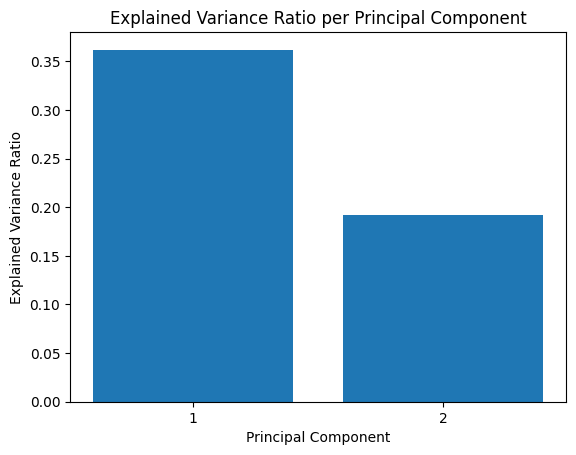

In [13]:
# Step 4: Determine Optimal Number of Components
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, n_components + 1))
plt.show()

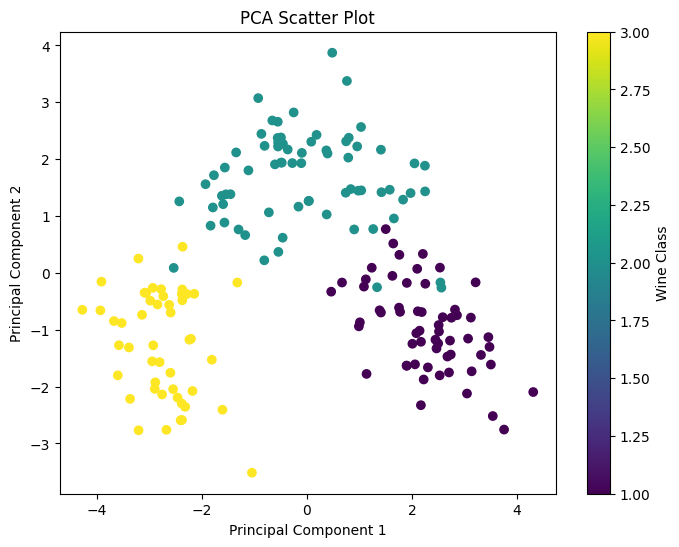

In [14]:
# Step 5: Visualize PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Wine Class')
plt.show()

C:\Users\tejav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tejav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tejav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tejav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

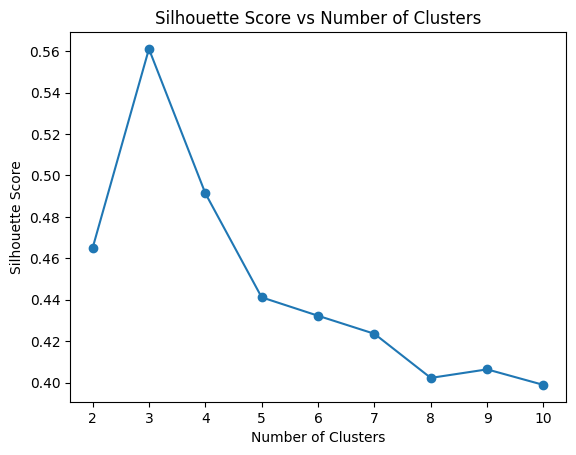

In [15]:
# Step 6: Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters
# For example, using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()